In [110]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as mlt
import numpy as np

In [111]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

In [112]:
X_train.shape

(50000, 32, 32, 3)

In [113]:
y_train.shape

(50000, 1)

In [114]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [115]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([19, 29,  0, 11,  1])

In [116]:
y_test = y_test.reshape(-1, )

In [117]:
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl',
           'boy',
           'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee',
           'clock',
           'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish',
           'forest',
           'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
           'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree',
           'orange',
           'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
           'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
           'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
           'tank',
           'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
           'willow_tree', 'wolf', 'woman', 'worm']

In [118]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow((X[index]))
    plt.xlabel(classes[y[index]])

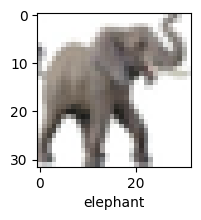

In [119]:
plot_sample(X_train, y_train, 9)

In [120]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
y_train = y_train.reshape(y_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
y_test = y_test.reshape(y_test.shape[0], 1)

In [121]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [134]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=keras.regularizers.l2(0.005),
                  activation='elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), kernel_regularizer=keras.regularizers.l2(0.005), activation='elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), kernel_regularizer=keras.regularizers.l2(0.005), activation='elu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), kernel_regularizer=keras.regularizers.l2(0.005), activation='elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units = 128, activation='elu'),
    layers.Dense(units = 256, activation='elu'),
    layers.Dense(units = 100, activation='softmax')
])

In [135]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [137]:
cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 172s 110ms/step - loss: 2.7511 - accuracy: 0.4092
Epoch 2/10
1563/1563 [==============================] - 185s 118ms/step - loss: 2.7006 - accuracy: 0.4169
Epoch 3/10
1563/1563 [==============================] - 188s 120ms/step - loss: 2.6523 - accuracy: 0.4260
Epoch 4/10
1563/1563 [==============================] - 176s 113ms/step - loss: 2.6130 - accuracy: 0.4335
Epoch 5/10
1563/1563 [==============================] - 222s 142ms/step - loss: 2.5756 - accuracy: 0.4425
Epoch 6/10
1563/1563 [==============================] - 143s 91ms/step - loss: 2.5395 - accuracy: 0.4467
Epoch 7/10
1563/1563 [==============================] - 136s 87ms/step - loss: 2.5109 - accuracy: 0.4524
Epoch 8/10
1563/1563 [==============================] - 136s 87ms/step - loss: 2.4862 - accuracy: 0.4584
Epoch 9/10
1563/1563 [==============================] - 142s 91ms/step - loss: 2.4602 - accuracy: 0.4640
Epoch 10/10
1563/1563 [===========================